In [20]:
import requests
import json
import pandas as pd

In [58]:
r = requests.get('https://bdl.stat.gov.pl/api/v1/subjects/search?name=ludność&format=json')
dzejson = json.loads(r.text)
pd.DataFrame(dzejson['results'])

,children,hasVariables,id,levels,name,parentId
0,[],False,P2574,[3],Aktywność ekonomiczna ludności wg BAEL (II kwa...,G570
1,[],False,P1386,[3],Aktywność ekonomiczna ludności wg BAEL (stan w...,G570
2,[],False,P1385,[3],Aktywność ekonomiczna ludności wg BAEL (stan w...,G570
3,[],False,P1387,[3],Aktywność ekonomiczna ludności wg BAEL (stan w...,G570
4,[],False,P2798,[7],Dane z rejestru PESEL - Ludność wg płci,G564
5,"[G7, G8, G10, G534, G535, G557, G564]",False,K3,"[3, 4, 5, 6, 7]",LUDNOŚĆ,NaN
6,[],False,P2355,[3],"Ludność aktywna zawodowo wg typu aktywności, w...",G380
7,[],False,P2884,[7],Ludność faktycznie zamieszkała wg grup wieku,G450
8,[],False,P1702,[6],Ludność korzystająca z oczyszczalni,G222
9,[],False,P2398,[5],Ludność korzystająca z oczyszczalni ścieków w ...,G222


In [126]:
r = requests.get('https://bdl.stat.gov.pl/api/v1/data/by-variable/72305?format=json&unit-level=6&page-size=100&year=2017')
dzejson = json.loads(r.text)
size = dzejson['totalRecords']
pagesize = 100
cities = pd.DataFrame()
for i in range(int(size/pagesize)):
    r = requests.get('https://bdl.stat.gov.pl/api/v1/data/by-variable/72305?format=json&unit-level=6&page-size=100&year=2017'+'&page='+str(i))
    dzejson = json.loads(r.text)
    cities = cities.append(pd.io.json.json_normalize(data=dzejson['results'],record_path='values',meta=['id','name']))
cities = cities.set_index('id')
cities = cities.drop('attrId', axis=1)

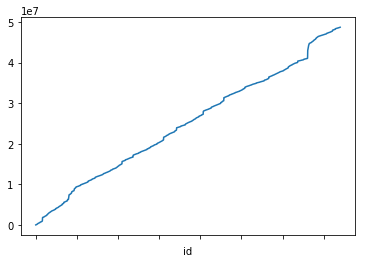

In [153]:
cities['val'].cumsum().plot()